# **Walking Distance Data Analysis**
## **Visualization Notebook**

### **Purpose**
This notebook visualizes walking distance data with the following goals:
1. To analyze trends in walking distances over time.
2. To highlight differences between weekdays and weekends.
3. To identify patterns related to specific years (e.g., the pandemic's impact on 2019 weekend activity).

### **Visualizations**
1. Histogram: Distribution of walking distances for weekdays vs weekends.
2. Boxplot: Yearly walking distances grouped by day type.
3. Heatmap: Weekly trends in walking distances.
4. Violin Plot: Walking distances by year with weekday/weekend separation.
5. Bar Chart: Yearly averages grouped by day type.
6. Boxplot: Walking distances by day of the week.

### Importing Libraries and Loading Data
The data will be extracted from an XML file and preprocessed into a structured format.
- `pandas` for data manipulation.
- `matplotlib` and `seaborn` for visualizations.

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reprocess the XML file to generate the dataset
file_path = 'export.xml'  
tree = ET.parse(file_path)
root = tree.getroot()

# Extract relevant data from the XML
data = []
for record in root.findall('.//Record'):
    if record.get('type') == 'HKQuantityTypeIdentifierDistanceWalkingRunning':
        date = record.get('startDate').split(' ')[0]
        distance = float(record.get('value'))
        data.append({'Date': date, 'WalkingDistance_km': distance})

# Create a DataFrame from the parsed data
df = pd.DataFrame(data)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Add additional time-based columns for analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Weekday'] = df['Date'].dt.dayofweek
df['DayOfWeek'] = df['Date'].dt.day_name()
df['IsWeekend'] = df['Weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

print(df.head())  

        Date  WalkingDistance_km  Year     Month  Weekday DayOfWeek IsWeekend
0 2019-10-28             0.02648  2019   October        0    Monday   Weekday
1 2019-10-28             0.00547  2019   October        0    Monday   Weekday
2 2019-11-29             0.09277  2019  November        4    Friday   Weekday
3 2019-11-29             0.05989  2019  November        4    Friday   Weekday
4 2019-11-29             0.07366  2019  November        4    Friday   Weekday


### Visualization 1: Histogram
This histogram shows the distribution of walking distances for weekdays vs weekends.
- **Observation**: Weekday distances are expected to be higher due to school and work routines.

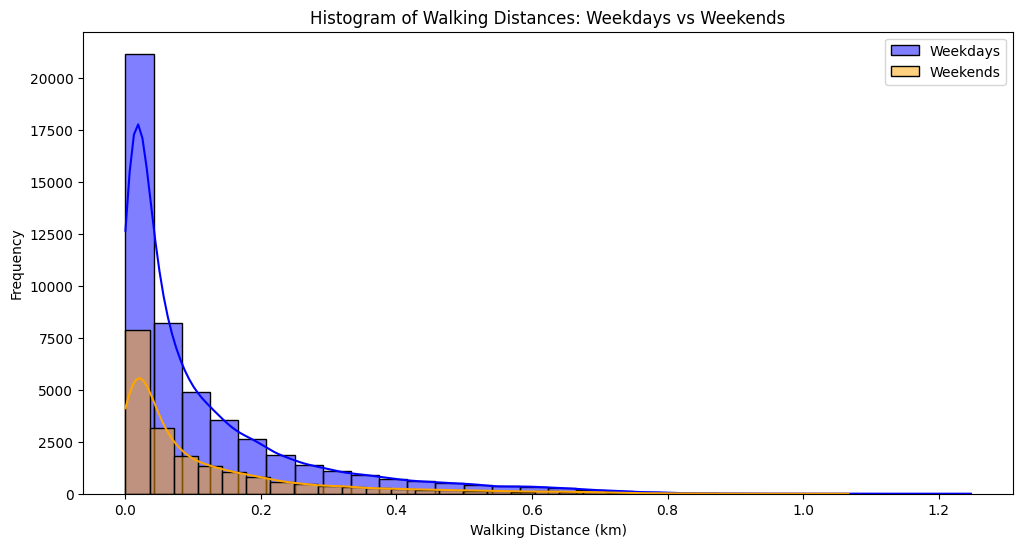

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['IsWeekend'] == 'Weekday']['WalkingDistance_km'], bins=30, color='blue', label='Weekdays', kde=True)
sns.histplot(df[df['IsWeekend'] == 'Weekend']['WalkingDistance_km'], bins=30, color='orange', label='Weekends', kde=True)
plt.title('Histogram of Walking Distances: Weekdays vs Weekends')
plt.xlabel('Walking Distance (km)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Visualization 2: Boxplot
This boxplot shows yearly walking distances, separated by weekdays and weekends.
- **Observation**: In 2019, the pandemic significantly increased weekend walking distances due to reduced restrictions.

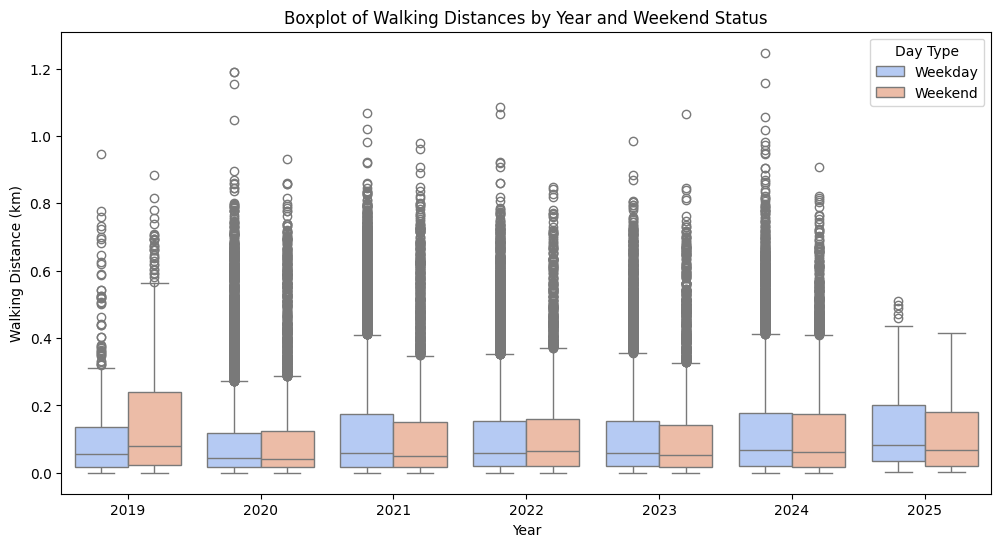

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Year', y='WalkingDistance_km', hue='IsWeekend', palette='coolwarm')
plt.title('Boxplot of Walking Distances by Year and Weekend Status')
plt.xlabel('Year')
plt.ylabel('Walking Distance (km)')
plt.legend(title='Day Type')
plt.show()

### Visualization 3: Heatmap
This heatmap shows weekly trends in walking distances over the years.
- **Observation**: Weekday walking distances are consistently higher, with fluctuations on weekends.

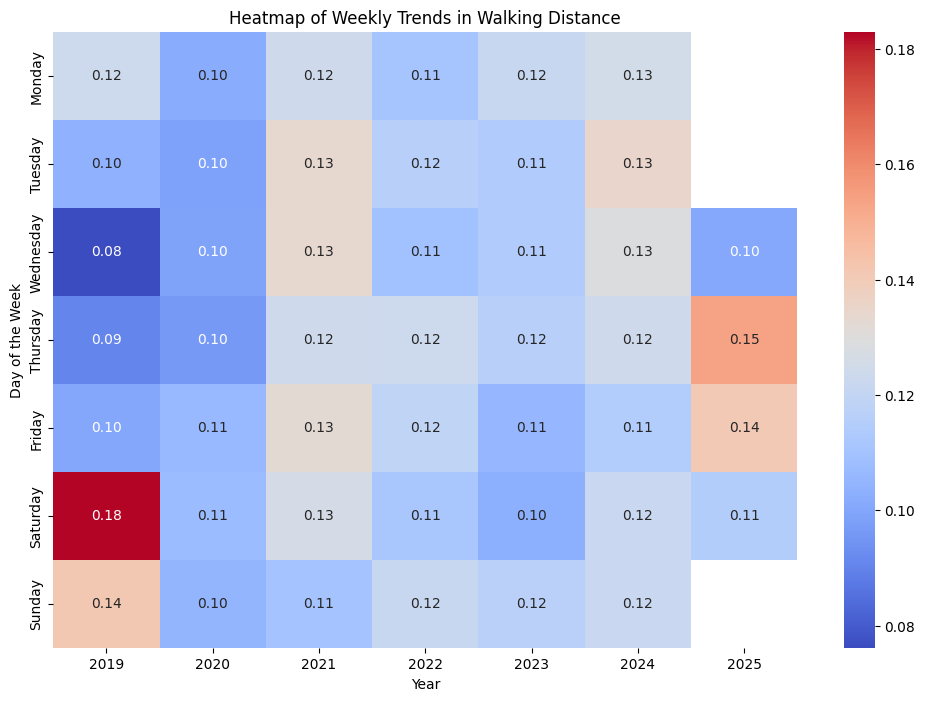

In [11]:
weekly_avg = df.pivot_table(index='DayOfWeek', columns='Year', values='WalkingDistance_km', aggfunc='mean')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 8))
sns.heatmap(weekly_avg.reindex(day_order), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap of Weekly Trends in Walking Distance')
plt.xlabel('Year')
plt.ylabel('Day of the Week')
plt.show()

### Visualization 4: Violin Plot
This violin plot shows the distribution of walking distances by year, separated by weekdays and weekends.
- **Observation**: 2019 shows an unexpected increase in weekend distances due to external factors like school-related weekend activities because of the pandemic.

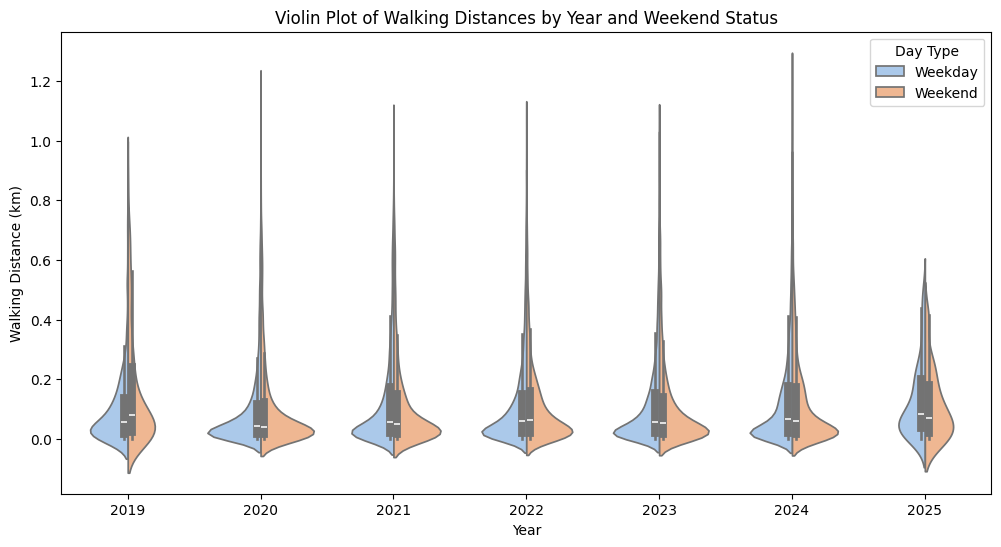

In [12]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Year', y='WalkingDistance_km', hue='IsWeekend', split=True, palette='pastel')
plt.title('Violin Plot of Walking Distances by Year and Weekend Status')
plt.xlabel('Year')
plt.ylabel('Walking Distance (km)')
plt.legend(title='Day Type')
plt.show()

### Visualization 5: Bar Chart
This bar chart highlights yearly average walking distances grouped by day type.
- **Observation**: A consistent increase in weekday distances over weekends across most years. However 2019 states that weekend walking+running distances are significantly higher due to the pandemic. During the pandemic the schools were open at weekends so it immadiately effected the  walking+running distances.

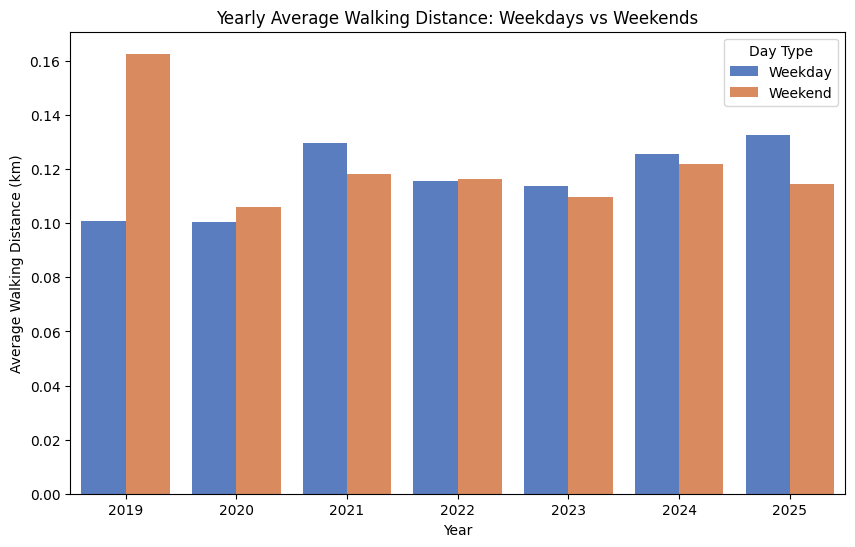

In [13]:
yearly_avg = df.groupby(['Year', 'IsWeekend'])['WalkingDistance_km'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_avg, x='Year', y='WalkingDistance_km', hue='IsWeekend', palette='muted')
plt.title('Yearly Average Walking Distance: Weekdays vs Weekends')
plt.xlabel('Year')
plt.ylabel('Average Walking Distance (km)')
plt.legend(title='Day Type')
plt.show()

### Visualization 6: Boxplot
This boxplot visualizes walking distances by day of the week.
- **Observation**: Walking distances are higher on weekdays, with reduced activity on weekends.

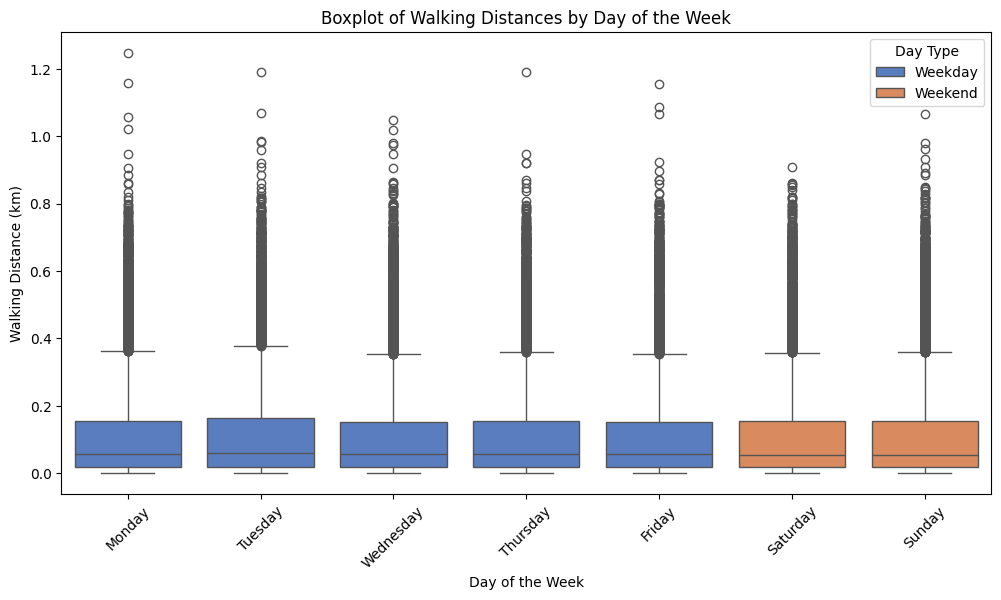

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='DayOfWeek', y='WalkingDistance_km', hue='IsWeekend', palette='muted',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Boxplot of Walking Distances by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Walking Distance (km)')
plt.legend(title='Day Type')
plt.xticks(rotation=45)
plt.show()